In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 3\\')

In [3]:
df1= pd.read_csv('Salary_Data.csv')
print (df1)


    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [4]:
x = df1.iloc[:,:-1]
print (x)


    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [5]:
y = df1.iloc[:,1]
print (y)


0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


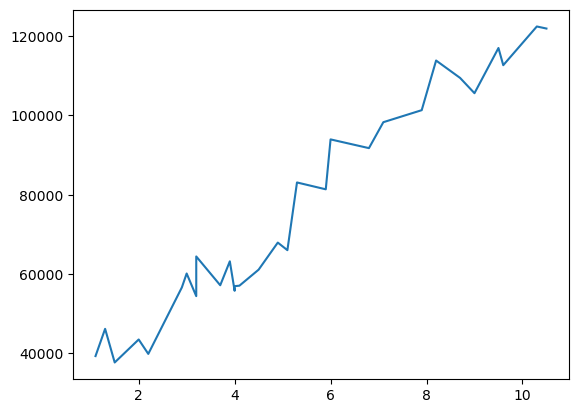

In [6]:
plt.plot (x,y)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print ('X Shape-',x.shape)
print ('Y Shape-', y.shape)
print ('X_Train Shape-',x_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',x_test.shape)
print ('Y_Test Shape-',y_test.shape)


X Shape- (30, 1)
Y Shape- (30,)
X_Train Shape- (24, 1)
Y_Train Shape- (24,)
X_Test Shape- (6, 1)
Y_Test Shape- (6,)


In [8]:
print (x_test)

    YearsExperience
0               1.1
9               3.7
11              4.0
28             10.3
10              3.9
20              6.8


In [10]:
x_train

,YearsExperience
6,3.0
1,1.3
16,5.1
18,5.9
8,3.2
19,6.0
17,5.3
26,9.5
22,7.9
27,9.6


In [9]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print (lr)


LinearRegression()


In [11]:
y_pred= lr.predict(x_test)
print (y_pred)


[ 36496.81737735  61048.00725771  63880.83685929 123370.25849248
  62936.56032543  90320.57980738]


In [12]:
print (x_test)

    YearsExperience
0               1.1
9               3.7
11              4.0
28             10.3
10              3.9
20              6.8


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9799196205838946

In [14]:
x_test=x_test.reset_index()
print (x_test)


   index  YearsExperience
0      0              1.1
1      9              3.7
2     11              4.0
3     28             10.3
4     10              3.9
5     20              6.8


In [15]:
x_test=x_test.drop('index',axis =1)
print (x_test)


   YearsExperience
0              1.1
1              3.7
2              4.0
3             10.3
4              3.9
5              6.8


In [16]:
y_test

0      39343
9      57189
11     55794
28    122391
10     63218
20     91738
Name: Salary, dtype: int64

In [17]:
y_test=y_test.reset_index()
print (y_test)


   index  Salary
0      0   39343
1      9   57189
2     11   55794
3     28  122391
4     10   63218
5     20   91738


In [18]:
y_test=y_test.drop('index',axis =1)
print (y_test)


   Salary
0   39343
1   57189
2   55794
3  122391
4   63218
5   91738


In [19]:
y_pred

array([ 36496.81737735,  61048.00725771,  63880.83685929, 123370.25849248,
        62936.56032543,  90320.57980738])

In [20]:
y_pred = pd.DataFrame (y_pred,columns = ['Prediction'])
print (y_pred)


      Prediction
0   36496.817377
1   61048.007258
2   63880.836859
3  123370.258492
4   62936.560325
5   90320.579807


In [21]:

result = pd.concat ([x_test,y_test,y_pred],axis =1)
result['Difference'] = y_test['Salary']- y_pred['Prediction']
print (result)


   YearsExperience  Salary     Prediction   Difference
0              1.1   39343   36496.817377  2846.182623
1              3.7   57189   61048.007258 -3859.007258
2              4.0   55794   63880.836859 -8086.836859
3             10.3  122391  123370.258492  -979.258492
4              3.9   63218   62936.560325   281.439675
5              6.8   91738   90320.579807  1417.420193


In [22]:
from sklearn.metrics import r2_score
accuracy =r2_score(y_test,y_pred)
print (accuracy)


0.9799196205838946
